In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import curve_fit
from sklearn.base import BaseEstimator, TransformerMixin


In [2]:
# Pulling the Data from the paper

# Table 2
kT_c = [9.81,8.1,7.42,7.07,6.62,6.43,6.01,5.45,5.31,5.18]
kT_X = [6.4,6.36,5.51,6.09,5.54,5.14,5.11,4.0,4.61,4.39]
kT_N = [8.55,7.12,6.0,6.73,6.24,6.55,5.79,5.57,5.23,5.4]

# Wallbank et al
kT_c = [8.9,12.23,7.38,7.15,8.29,9.25,14.57,15.8]
kT_N = [6.83,9.72,6.42,4.94,7.45,8.58,12.58,12.64]

# all together
kT_c = [9.81,8.1,7.42,7.07,6.62,6.43,6.01,5.45,5.31,5.18,8.9,12.23,7.38,7.15,8.29,9.25,14.57,15.8]
kT_N = [8.55,7.12,6.0,6.73,6.24,6.55,5.79,5.57,5.23,5.4,6.83,9.72,6.42,4.94,7.45,8.58,12.58,12.64]

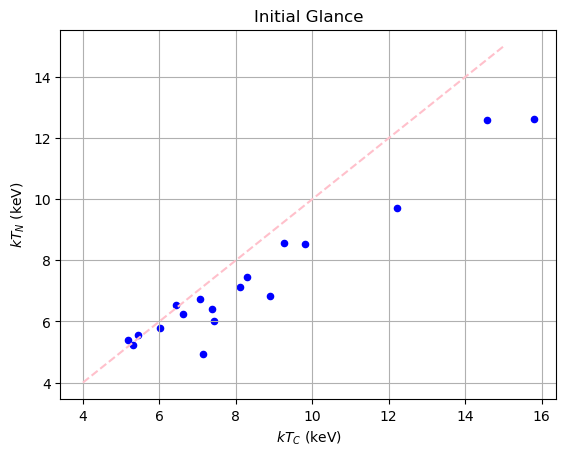

In [3]:
# Check out the data
fig,ax = plt.subplots()
ax.scatter(kT_c,kT_N,s=20,color='blue')

# plot one to one
ax.plot([4,15],[4,15],linestyle='dashed',color='pink')

ax.set(xlabel=r"$kT_C$ (keV)", ylabel=r"$kT_N$ (keV)")

ax.set_title("Initial Glance")

ax.grid()

Split the Data into Training and Test Sets

In [4]:
# convert data to numpy arrays
X = np.array(kT_c).reshape(-1, 1)  # Reshape x to be a 2D array (with one feature)
Y = np.array(kT_N)

# split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# print the splits
print("X_train:", X_train.flatten())  # flatten to convert back to 1D for easy viewing
print("X_test:", X_test.flatten())
print("Y_train:", Y_train)
print("Y_test:", Y_test)

X_train: [ 9.25  6.62  8.9   6.01  7.15  6.43  7.42 12.23 15.8   8.1   9.81  5.45]
X_test: [ 8.29  5.31  5.18  7.38  7.07 14.57]
Y_train: [ 8.58  6.24  6.83  5.79  4.94  6.55  6.    9.72 12.64  7.12  8.55  5.57]
Y_test: [ 7.45  5.23  5.4   6.42  6.73 12.58]


Plot the Sets

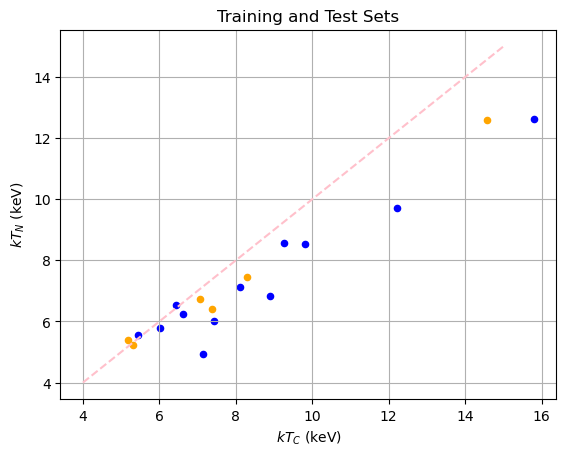

In [5]:
fig,ax = plt.subplots()

# plot training
ax.scatter(X_train,Y_train,s=20,color='blue')
# plot test
ax.scatter(X_test,Y_test,s=20,color='orange')

# plot one to one
ax.plot([4,15],[4,15],linestyle='dashed',color='pink')

ax.set(xlabel=r"$kT_C$ (keV)", ylabel=r"$kT_N$ (keV)")

ax.set_title("Training and Test Sets")

ax.grid()

Mean Squared Error (Sum of Squared Residuals) Function

In [6]:
#calculate sum of squared residuals (mean squred error)
def MSE(data,model):
    sum = 0
    for idx,d in enumerate(data):
        res = d - model[idx]
        sqrd_res = res**2
        sum += sqrd_res
    
    return sum / len(data)

# Alternatively:    
# def MSE(data,model):
#     return mean_squared_error(data,model)

A Function to Evaluate the Fit

In [7]:
# evaluate the fits with MSE and r^2
def evaluate(train,test,model):
    mse_train = MSE(Y_train,train)
    mse_test = MSE(Y_test,test)
    mse_change = mse_test / mse_train
    
    r2_train = r2_score(Y_train,train)
    r2_test = r2_score(Y_test,test)
    r2_change = r2_train - r2_test
    
    print(model + " MSE Train: " + str(mse_train))
    print(model + " MSE Test: " + str(mse_test))
    print(model + " MSE Test / Train: " + str(mse_change))
    print(model + " r2 Train: " + str(r2_train))
    print(model + " r2 Test: " + str(r2_test))
    print(model + " r2 train-test: " + str(r2_change))

    return [model + " MSE Train: " + str(mse_train),
            model + " MSE Test: " + str(mse_test),
            model + " MSE Test / Train: " + str(mse_change),
            model + " r2 Train: " + str(r2_train),
            model + " r2 Test: " + str(r2_test),
            model + " r2 train-test: " + str(r2_change)]
    

Fiona's Fit

Fiona's MSE Train: 0.5937961329778704
Fiona's MSE Test: 0.08845702641892822
Fiona's MSE Test / Train: 0.14896868050540982
Fiona's r2 Train: 0.8628984744290031
Fiona's r2 Test: 0.9856148269481191
Fiona's r2 train-test: -0.12271635251911595


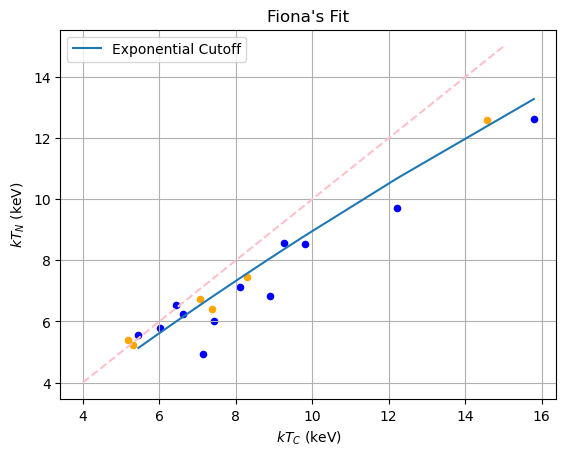

In [8]:
# Fiona's function (as in the paper)
def func(T_c):
    B = 1.0
    T_cut = 91
    return B * T_c * np.exp(-T_c/T_cut)

fit_x = kT_c
fit_y = []
for k in fit_x:
    fit_y.append(func(k))

# evaluate the fit
fiona_train_x = X_train
fiona_train_y = []
for k in fiona_train_x:
    fiona_train_y.append(func(k))
    
fiona_test_x = X_test
fiona_test_y = []
for k in fiona_test_x:
    fiona_test_y.append(func(k))    

all_evals = []
all_evals.append(evaluate(fiona_train_y,fiona_test_y,"Fiona's"))

#plot
sorted_indices = np.argsort(X_train[:, 0])
sorted_x_train = X_train[sorted_indices, 0]
fiona_train_y = np.array(fiona_train_y)
fiona_train_y = fiona_train_y.reshape(-1, 1)
sorted_y_train = fiona_train_y[sorted_indices]
ax.plot(sorted_x_train, sorted_y_train, label='Exponential Cutoff')
ax.legend()
ax.set_title("Fiona's Fit")
fig

Try Fitting Line w/ Linear Regression

Line MSE Train: 0.36757798948018755
Line MSE Test: 0.24743004826721873
Line MSE Test / Train: 0.6731361924502697
Line r2 Train: 0.9151299573620975
Line r2 Test: 0.9597621104093821
Line r2 train-test: -0.04463215304728463


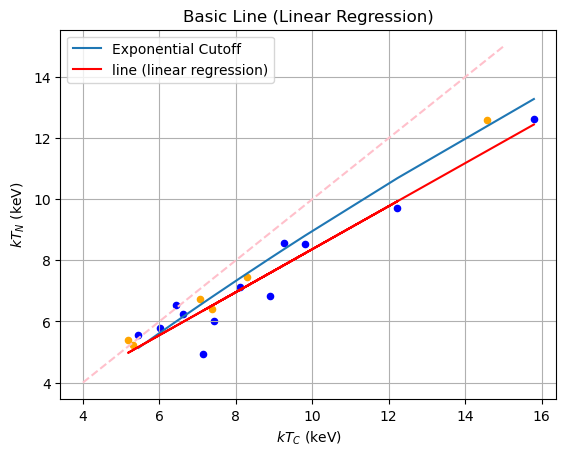

In [10]:
# linear function
def line(x,m,b):
    return m*x + b

# Fit a linear polynomial (degree 1)
m, b = np.polyfit(X_train.flatten(), Y_train, 1)

fit_x2 = kT_c
fit_y2 = []
for k in fit_x2:
    fit_y2.append(line(k,m,b))

# evaluate the fit
line_train_x = X_train
line_train_y = []
for k in line_train_x:
    line_train_y.append(line(k,m,b))
    
line_test_x = X_test
line_test_y = []
for k in line_test_x:
    line_test_y.append(line(k,m,b))    

all_evals.append(evaluate(line_train_y,line_test_y,"Line"))

# plot the linear regression line
ax.plot(fit_x2,fit_y2,label='line (linear regression)',color='red')
ax.legend()
ax.set_title("Basic Line (Linear Regression)")
fig

Fit Line with Ridge Regression

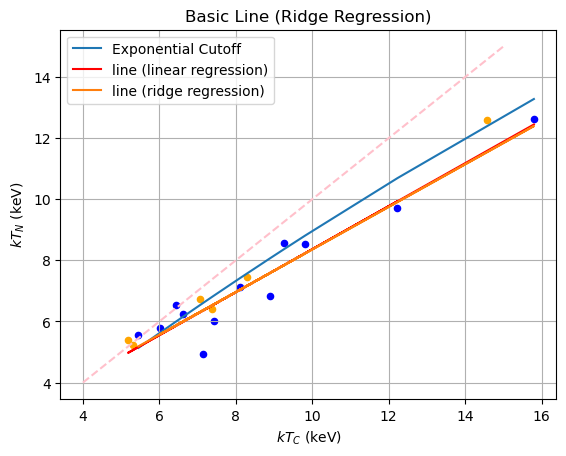

In [11]:
# instantiate the ridge regression model with 1 degree polynomial features
degree = 1 
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

# fit model
ridge_model.fit(X_train, Y_train)

# predict values
ridge_predictions_train = ridge_model.predict(X_train)
ridge_predictions_test = ridge_model.predict(X_test)

# plot the linear regression line
ax.plot(X_train,ridge_predictions_train,label='line (ridge regression)')#,color='red')
ax.legend()
ax.set_title("Basic Line (Ridge Regression)")
fig

Fit Polynomial w Ridge Regression

Poly 3 MSE Train: 0.34239822538327314
Poly 3 MSE Test: 0.18942220154841516
Poly 3 MSE Test / Train: 0.5532219138588702
Poly 3 r2 Train: 0.9209437103986694
Poly 3 r2 Test: 0.969195537545685
Poly 3 r2 train-test: -0.04825182714701559


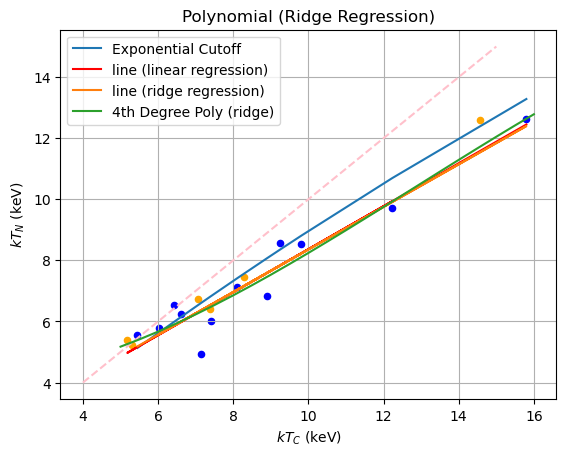

In [12]:
# create the ridge model
# vary this degree to evauate differnt polynomials
degree = 3
ridge_model_2 = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

# fit model
ridge_model_2.fit(X_train, Y_train)

# predict values
ridge_predictions_train_2 = ridge_model_2.predict(X_train)
ridge_predictions_test_2 = ridge_model_2.predict(X_test)

to_plot_x = np.arange(5,16.5,0.5)
ridge_pred_to_plot = ridge_model_2.predict(to_plot_x[:, np.newaxis])

# evaluate the fit
all_evals.append(evaluate(ridge_predictions_train_2,ridge_predictions_test_2,"Poly 3"))

# plot the linear regression line
sorted_indices = np.argsort(X_train[:, 0])
sorted_x_train = X_train[sorted_indices, 0]
sorted_y_train = ridge_predictions_train_2[sorted_indices]
#ax.plot(sorted_x_train, sorted_y_train, label='Polynomial (ridge)',color='green')
ax.plot(to_plot_x[:, np.newaxis],ridge_pred_to_plot,label='4th Degree Poly (ridge)')#,color='green')

#ax.plot(X_train,ridge_predictions_train,label='Poly2 (ridge regression)')#,color='red')
ax.legend()
ax.set_title("Polynomial (Ridge Regression)")
fig

Standard Fit w/ Fiona's Model (Just Using an Optimization Routine, not ridge)

In [13]:
# defining the model function to fit
def model_func(T_c, B, T_cut):
    return B * T_c * np.exp(-T_c / T_cut)
    
# initial guesses
initial_guesses = [1, 91]

# doing the fit
params_opt, params_cov = curve_fit(model_func, X_train.flatten(), Y_train.flatten(), p0=initial_guesses)

# extracting the optimized parameters
B_opt, T_cut_opt = params_opt

# predict values
standard_fiona_train = model_func(X_train, *params_opt)
standard_fiona_test = model_func(X_test, *params_opt)

# evaluate the fit
all_evals.append(evaluate(standard_fiona_train,standard_fiona_test,"Standard Fiona"))

# plot the fit
#ax.plot(X_train,standard_fiona_train,label="standard Fiona")
# sorted_indices = np.argsort(X_train[:, 0])
# sorted_x_train = X_train[sorted_indices, 0]
# fiona_train_y = np.array(standard_fiona_train)
# fiona_train_y = standard_fiona_train.reshape(-1, 1)
# sorted_y_train = standard_fiona_train[sorted_indices]
# ax.plot(sorted_x_train, sorted_y_train, label='Fiona standard')
# ax.set_title("Fitting Fiona's Function a Standard Way")
# ax.legend()
# fig




Standard Fiona MSE Train: 0.40685896217305095
Standard Fiona MSE Test: 0.3123075770166808
Standard Fiona MSE Test / Train: 0.7676064829655781
Standard Fiona r2 Train: 0.9060603777824928
Standard Fiona r2 Test: 0.9492115129495551
Standard Fiona r2 train-test: -0.04315113516706226


Examine Fits

In [14]:
for k in all_evals:
    for j in k:
        print(j)
    print("\n")

Fiona's MSE Train: 0.5937961329778704
Fiona's MSE Test: 0.08845702641892822
Fiona's MSE Test / Train: 0.14896868050540982
Fiona's r2 Train: 0.8628984744290031
Fiona's r2 Test: 0.9856148269481191
Fiona's r2 train-test: -0.12271635251911595


Line MSE Train: 0.36757798948018755
Line MSE Test: 0.24743004826721873
Line MSE Test / Train: 0.6731361924502697
Line r2 Train: 0.9151299573620975
Line r2 Test: 0.9597621104093821
Line r2 train-test: -0.04463215304728463


Poly 3 MSE Train: 0.34239822538327314
Poly 3 MSE Test: 0.18942220154841516
Poly 3 MSE Test / Train: 0.5532219138588702
Poly 3 r2 Train: 0.9209437103986694
Poly 3 r2 Test: 0.969195537545685
Poly 3 r2 train-test: -0.04825182714701559


Standard Fiona MSE Train: 0.40685896217305095
Standard Fiona MSE Test: 0.3123075770166808
Standard Fiona MSE Test / Train: 0.7676064829655781
Standard Fiona r2 Train: 0.9060603777824928
Standard Fiona r2 Test: 0.9492115129495551
Standard Fiona r2 train-test: -0.04315113516706226




Fit Fiona's Model With Ridge

In [19]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

def model_loss(T_cut):
    # transform x based on T_cut
    X = X_train.flatten() * np.exp(-X_train.flatten() / T_cut)
    
    # fit ridge regression model
    model = Ridge(alpha=1.0)  # ridge regularization strength
    model.fit(X[:, np.newaxis], Y_train.flatten())  # X needs to be 2D for sklearn
    
    # mean squared error
    Y_pred = model.predict(X[:, np.newaxis])
    mse = mean_squared_error(Y_train.flatten(), Y_pred)
    
    # penalizing larger T_cut values
    regularization_strength = 0.001
    regularization_term = regularization_strength * T_cut
    
    # total loss: MSE + regularization term
    total_loss = mse + regularization_term
    return total_loss, model.coef_[0]

# initial guess for T_cut
initial_guess = [91.0] 

# bounds for T_cut
bounds = [(1., 120.)] 

# optimization
result = minimize(lambda T_cut: model_loss(T_cut)[0], x0=initial_guess, bounds=bounds)

# call and print the optimized values
optimized_T_cut = result.x[0]
loss, optimized_B = model_loss(optimized_T_cut)

print(f"Optimized B: {optimized_B}")
print(f"Optimized T_cut: {optimized_T_cut}")
print(f"Minimized Loss: {loss}")

Optimized B: 0.9672871289191134
Optimized T_cut: 62.700861328929165
Minimized Loss: 0.4737596169028187


Plotting the Optimized Function

Final Fit MSE Train: 0.4613224423455066
Final Fit MSE Test: 0.5725650288601827
Final Fit MSE Test / Train: 1.2411384669453414
Final Fit r2 Train: 0.893485310676376
Final Fit r2 Test: 0.9068875887303567
Final Fit r2 train-test: -0.013402278053980643


Fiona's MSE Train: 0.5937961329778704
Fiona's MSE Test: 0.08845702641892822
Fiona's MSE Test / Train: 0.14896868050540982
Fiona's r2 Train: 0.8628984744290031
Fiona's r2 Test: 0.9856148269481191
Fiona's r2 train-test: -0.12271635251911595


Line MSE Train: 0.36757798948018755
Line MSE Test: 0.24743004826721873
Line MSE Test / Train: 0.6731361924502697
Line r2 Train: 0.9151299573620975
Line r2 Test: 0.9597621104093821
Line r2 train-test: -0.04463215304728463


Poly 3 MSE Train: 0.34239822538327314
Poly 3 MSE Test: 0.18942220154841516
Poly 3 MSE Test / Train: 0.5532219138588702
Poly 3 r2 Train: 0.9209437103986694
Poly 3 r2 Test: 0.969195537545685
Poly 3 r2 train-test: -0.04825182714701559


Standard Fiona MSE Train: 0.40685896217305095
Stand

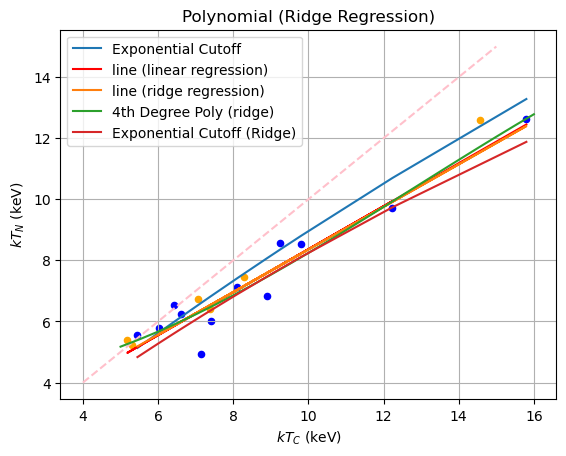

In [20]:
# Fiona's function with optimized parameters
def func(T_c):
    B = optimized_B
    T_cut = optimized_T_cut
    return B * T_c * np.exp(-T_c/T_cut)

fit_x = kT_c
fit_y = []
for k in fit_x:
    fit_y.append(func(k))

# evaluate the fit
fiona_train_x = X_train
fiona_train_y = []
for k in fiona_train_x:
    fiona_train_y.append(func(k))
    
fiona_test_x = X_test
fiona_test_y = []
for k in fiona_test_x:
    fiona_test_y.append(func(k))    

all_evals.append(evaluate(fiona_train_y,fiona_test_y,"Final Fit"))
print("\n")
for k in all_evals:
    for j in k:
        print(j)
    print("\n")

# plot it seperately
# fig,ax = plt.subplots()

# ax.scatter(X_train,Y_train,s=20,color='blue')
# ax.scatter(X_test,Y_test,s=20,color='orange')
# # plot one to one
# ax.plot([4,15],[4,15],linestyle='dashed',color='pink')
# ax.set(xlabel=r"$kT_C$ (keV)", ylabel=r"$kT_N$ (keV)")
# ax.set_title("Final Fit")
# ax.grid()

# plot it
sorted_indices = np.argsort(X_train[:, 0])
sorted_x_train = X_train[sorted_indices, 0]
fiona_train_y = np.array(fiona_train_y)
fiona_train_y = fiona_train_y.reshape(-1, 1)
sorted_y_train = fiona_train_y[sorted_indices]
ax.plot(sorted_x_train, sorted_y_train, label='Exponential Cutoff (Ridge)')
ax.legend()
fig